In [179]:
import xarray as xr
import numpy as np
import pymannkendall as pmk
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy import feature as cf
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [180]:
import pandas as pd
print('all libraries are loaded')

all libraries are loaded


In [181]:
in_file='C:\\Climate_Tutorial\\ERA5 DATASET\\Max consec wet days\\CWD_C3S-glob-agric_hadgem2-es_rcp8p5_season_20110101-20401231_v1.1.nc'

In [183]:
# open data
Data=xr.open_dataset(in_file)
Data

<xarray.Dataset>
Dimensions:      (bounds: 2, lat: 360, lon: 720, time: 119)
Coordinates:
  * time         (time) datetime64[ns] 2011-04-16 2011-07-16 ... 2040-10-16
  * lat          (lat) float64 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * lon          (lon) float64 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
Dimensions without coordinates: bounds
Data variables:
    time_bounds  (time, bounds) datetime64[ns] ...
    CWD          (time, lat, lon) float32 ...
Attributes:
    title:          CWD index from ECA rain indices
    institution:    Copernicus Climate Change Service
    source:         Climate projection datasets from the ISIMIP Fast Track pr...
    references:     Tank, A.K., 2010. European Climate Assessment and Dataset...
    comment:        
    history:        Tue Sep 19 09:55:31 2017: cdo -f nc4c -z zip mergetime pr...
    summary:        
    Conventions:    CF-1.7
    contact:        https://climate.copernicus.eu
    project:        C3S_422 Global Agriculture
    creation_date:  2019-04-18T07:06:49GMT
    lineage:        
    keywords:       
    license:

In [184]:
Data=Data['CWD'].groupby('time.year').mean('time')
Data=Data.sel(lon=np.arange(-20,18,0.5),lat=np.arange(0,20,0.5),method='nearest')

In [185]:
# Data

In [186]:
# Data.data_vars

## Extract the specific variable "R10mm"

In [187]:
# Data=Data['R10mm'].groupby('time.year').mean('time') # Convertion from monthly
# to yearly means
# Extract data for a particular region defined by it long and lat
# Data=Data.sel(lon=np.arange(-25.5,55.5,0.5),lat=np.arange(0,35,0.5),method='nearest')

###### Apply the function on individual point on the spatial grid. Each individual
###### point is defined by its own position, and these individual positions are 
###### increasing in defined steps. So what we need to do is to apply loop

In [188]:
# Now use the "mk" function and run it on the data and select on the perticular
# long and lat

output=[]
# Then, we loop through by;
for i in np.arange(len(Data.lat.values)):
    for j in np.arange(len(Data.lon.values)):
        
        try:
            slope_val=mk.original_test(Data[:,i,j]).trend
        except: 
            slope_val=-9999
        output.append (slope_val)

In [189]:
output=np.copy(output).reshape(Data.lat.size,Data.lon.size)

In [190]:
output

array([[-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       ...,
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999]])

In [191]:
pos_trends=['decreasing','no trend','increasing']
output[output==pos_trends[2]]=1;
output[output==pos_trends[0]]=-1
output[output==pos_trends[1]]=0;

<ipython-input-191-d88efbf5c2ec>:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  output[output==pos_trends[2]]=1;
<ipython-input-191-d88efbf5c2ec>:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  output[output==pos_trends[0]]=-1
<ipython-input-191-d88efbf5c2ec>:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  output[output==pos_trends[1]]=0;


In [192]:
output=np.int_(output)
output

array([[-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       ...,
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999],
       [-9999, -9999, -9999, ..., -9999, -9999, -9999]])

C:\Users\usert\anaconda3\lib\site-packages\matplotlib\contour.py:1494: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\usert\anaconda3\lib\site-packages\matplotlib\contour.py:1495: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


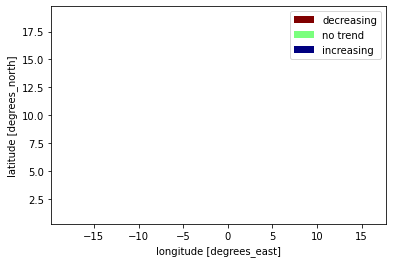

In [193]:
trends=xr.DataArray(output, dims=('lat','lon'), coords={'lat':Data.lat, 'lon':Data.lon}, name='trend')
cs=trends.where(trends>-9999).plot.contourf(cmap='jet_r', levels=[-2,-1,0,1],add_colorbar=False)

artists, labels = cs.legend_elements()
plt.legend(handles=artists, labels=pos_trends)

###### Once that is done, Now change the multidimensional data array of the function "output" into
###### an xarray dataarray to make it eazier to work with. We just use the below code

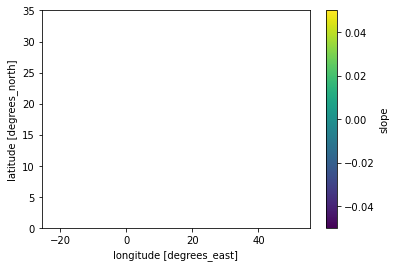

In [130]:
# Use xr.dataarray and pass in into output and define the dimension use dictionary "coords"
# and pass the variable "slopes"
# slopes=xr.DataArray(output, dims=('lat','lon'), coords={'lat':Data.lat, 'lon':Data.lon}, name='slope')
#slopes.plot()

In [108]:
Data.isel(time=0).plot(robust=True)

ValueError: dimensions {'time'} do not exist. Expected one or more of ('year', 'lat', 'lon')